In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
requests.__version__
import time
from datetime import datetime


from config import *

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

#url ="api.openweathermap.org/data/2.5/weather?q=" + weather_api_key               &APPID

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=825b4f9d7db94dffe76afa90bcc7ef84


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)   

#this will generate a link that will proivide the same output as the line of code below

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=825b4f9d7db94dffe76afa90bcc7ef84&q=Boston


In [8]:
city_url_Boston= requests.get(city_url).json()
print(city_url_Boston)

{'coord': {'lon': -71.0598, 'lat': 42.3584}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 74.03, 'feels_like': 73.53, 'temp_min': 70.95, 'temp_max': 76.28, 'pressure': 1015, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 190}, 'clouds': {'all': 100}, 'dt': 1654641438, 'sys': {'type': 2, 'id': 2013408, 'country': 'US', 'sunrise': 1654592877, 'sunset': 1654647513}, 'timezone': -14400, 'id': 4930956, 'name': 'Boston', 'cod': 200}


In [9]:
# To get a list of Keys from our search would be:
city_Boston_Keys = city_url_Boston.keys()
city_Boston_Keys

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [10]:
# To determine the value at eacch Key such as main:

city_url_Boston.get('weather')

[{'id': 804,
  'main': 'Clouds',
  'description': 'overcast clouds',
  'icon': '04d'}]

In [11]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Get the text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 74.05,
  'feels_like': 73.54,
  'temp_min': 70.95,
  'temp_max': 76.28,
  'pressure': 1015,
  'humidity': 51},
 'visibility': 10000,
 'wind': {'speed': 16.11, 'deg': 190},
 'clouds': {'all': 100},
 'dt': 1654641369,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1654592877,
  'sunset': 1654647513},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()


{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 74.03,
  'feels_like': 73.53,
  'temp_min': 70.95,
  'temp_max': 76.28,
  'pressure': 1015,
  'humidity': 51},
 'visibility': 10000,
 'wind': {'speed': 16.11, 'deg': 190},
 'clouds': {'all': 100},
 'dt': 1654641438,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1654592877,
  'sunset': 1654647513},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Get the JSON data.
boston_data = city_weather.json()

In [15]:
# WE're now delving into the dictionary of data in correspondance to 'sys' and cannot access other keys
    # This is different from the dictionary list we found from Boston or city_weather.json() 
    # since its embedded inside the Boston list
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1654592877,
 'sunset': 1654647513}

In [16]:
# We'll now dive into the 'sys' dictionary and access its Keys
boston_data['sys']['country']

'US'

In [17]:
boston_data['weather'][0]['description']

'overcast clouds'

In [18]:
boston_data['dt']

1654641438

In [19]:
# Using similar syntax to get the:
    # time of day, we can get the latitude, longitude, maximum temperature, humidity, percent cloudiness, and wind speed
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 76.28 51 100 16.11


In [20]:
#### Datetime Conversion
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
# .utcfromtimestamp(date) this chain lets us convert the unicode of date generated from boston_data['dt']
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %I:%M:%S:%p')

# the .strftime('%Y-%m-%d %H:%M:%S') formats the datetime conversion into something more readable
# https://docs.python.org/3.7/library/datetime.html#strftime-and-strptime-behavior

'2022-06-07 10:37:18:PM'

In [21]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(15)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | ishurdi
Processing Record 3 of Set 1 | olafsvik
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | chino valley
Processing Record 6 of Set 1 | nikel
Processing Record 7 of Set 1 | salalah
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | okakarara
Processing Record 10 of Set 1 | jitra
Processing Record 11 of Set 1 | coquimbo
Processing Record 12 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | port-gentil
Processing Record 15 of Set 1 | kolochava
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | nzerekore
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | vardo
Processing Record 

Processing Record 36 of Set 4 | nizhnyaya tura
Processing Record 37 of Set 4 | katsuura
Processing Record 38 of Set 4 | key biscayne
Processing Record 39 of Set 4 | noumea
Processing Record 40 of Set 4 | kaitangata
Processing Record 41 of Set 4 | tsuyama
Processing Record 42 of Set 4 | tual
Processing Record 43 of Set 4 | roma
Processing Record 44 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 45 of Set 4 | cabedelo
Processing Record 46 of Set 4 | azimur
City not found. Skipping...
Processing Record 47 of Set 4 | hamina
Processing Record 48 of Set 4 | rio gallegos
Processing Record 49 of Set 4 | burns lake
Processing Record 50 of Set 4 | ribeira grande
Processing Record 1 of Set 5 | ostersund
Processing Record 2 of Set 5 | charlestown
Processing Record 3 of Set 5 | bethel
Processing Record 4 of Set 5 | marawi
Processing Record 5 of Set 5 | jalingo
Processing Record 6 of Set 5 | peniche
Processing Record 7 of Set 5 | ngunguru
Processing Record 8 of Set 5 | tsihombe

Processing Record 25 of Set 8 | bilibino
Processing Record 26 of Set 8 | abonnema
Processing Record 27 of Set 8 | berdigestyakh
Processing Record 28 of Set 8 | norwich
Processing Record 29 of Set 8 | hungund
Processing Record 30 of Set 8 | prado
Processing Record 31 of Set 8 | alofi
Processing Record 32 of Set 8 | tiksi
Processing Record 33 of Set 8 | diapaga
Processing Record 34 of Set 8 | yumen
Processing Record 35 of Set 8 | itapirapua
Processing Record 36 of Set 8 | flin flon
Processing Record 37 of Set 8 | ginir
Processing Record 38 of Set 8 | evansville
Processing Record 39 of Set 8 | tidore
City not found. Skipping...
Processing Record 40 of Set 8 | zabinka
City not found. Skipping...
Processing Record 41 of Set 8 | pangnirtung
Processing Record 42 of Set 8 | jinka
Processing Record 43 of Set 8 | saint-augustin
Processing Record 44 of Set 8 | ouesso
Processing Record 45 of Set 8 | rocha
Processing Record 46 of Set 8 | boralday
Processing Record 47 of Set 8 | alpena
Processing Re

Processing Record 13 of Set 12 | champasak
Processing Record 14 of Set 12 | kismayo
Processing Record 15 of Set 12 | belgaum
Processing Record 16 of Set 12 | komsomolskiy
Processing Record 17 of Set 12 | hasaki
Processing Record 18 of Set 12 | liverpool
Processing Record 19 of Set 12 | batyrevo
Processing Record 20 of Set 12 | esil
Processing Record 21 of Set 12 | pacific grove
Processing Record 22 of Set 12 | lagoa
Processing Record 23 of Set 12 | manta
Processing Record 24 of Set 12 | pajapan
Processing Record 25 of Set 12 | praia
Processing Record 26 of Set 12 | kiunga
Processing Record 27 of Set 12 | guanica
Processing Record 28 of Set 12 | iaciara
Processing Record 29 of Set 12 | guerrero negro
Processing Record 30 of Set 12 | yerbogachen
Processing Record 31 of Set 12 | henties bay
Processing Record 32 of Set 12 | susanville
Processing Record 33 of Set 12 | auki
Processing Record 34 of Set 12 | matamoros
Processing Record 35 of Set 12 | matara
Processing Record 36 of Set 12 | bar

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,72.64,55,2,12.30,PF,2022-06-07 22:44:05
1,Ishurdi,24.1333,89.0833,81.28,86,100,8.90,BD,2022-06-07 22:44:05
2,Olafsvik,64.8945,-23.7142,50.32,83,100,3.62,IS,2022-06-07 22:44:06
3,Cape Town,-33.9258,18.4232,68.38,56,0,3.44,ZA,2022-06-07 22:44:06
4,Chino Valley,34.7575,-112.4538,97.41,15,0,10.36,US,2022-06-07 22:44:06
5,Nikel,69.4128,30.2220,44.78,83,30,8.72,RU,2022-06-07 22:44:07
6,Salalah,17.0151,54.0924,84.29,79,40,6.91,OM,2022-06-07 22:44:07
7,Okakarara,-20.5833,17.4333,45.18,58,0,6.33,NA,2022-06-07 22:44:07
8,Jitra,6.2681,100.4217,76.91,100,20,3.44,MY,2022-06-07 22:44:08
9,Coquimbo,-29.9533,-71.3436,56.93,88,75,10.36,CL,2022-06-07 22:44:08


In [24]:
# Reorder columns
new_column_order= ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-06-07 22:44:05,-23.1203,-134.9692,72.64,55,2,12.30
1,Ishurdi,BD,2022-06-07 22:44:05,24.1333,89.0833,81.28,86,100,8.90
2,Olafsvik,IS,2022-06-07 22:44:06,64.8945,-23.7142,50.32,83,100,3.62
3,Cape Town,ZA,2022-06-07 22:44:06,-33.9258,18.4232,68.38,56,0,3.44
4,Chino Valley,US,2022-06-07 22:44:06,34.7575,-112.4538,97.41,15,0,10.36
...,...,...,...,...,...,...,...,...,...
582,Yuryuzan,RU,2022-06-07 22:51:29,54.8633,58.4219,50.13,95,100,9.40
583,Zabol,AF,2022-06-07 22:51:30,32.2500,67.2500,67.41,13,0,9.31
584,Suihua,CN,2022-06-07 22:51:30,46.6406,126.9969,66.06,51,2,1.23
585,Lyngseidet,NO,2022-06-07 22:51:30,69.5763,20.2189,46.40,94,97,9.40


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%X")
today

'18:53:38'

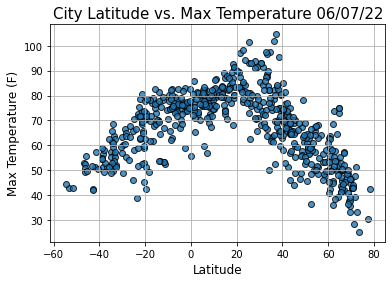

In [28]:
### Plot Latitude vs. Temperature 6.3.1

# Import time module
import time

## Build the scatter plot for Latitude vs. Max Temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"),fontsize = 15)
plt.ylabel("Max Temperature (F)", fontsize = 12)
plt.xlabel("Latitude", fontsize = 12)
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

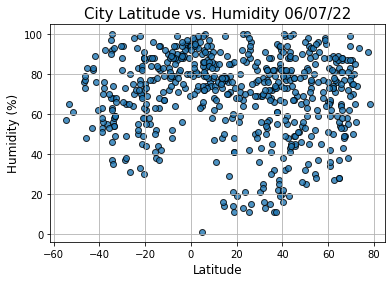

In [29]:
### Build the scatter plots for Latitude vs. Humidity.  6.3.2
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"),fontsize = 15)
plt.ylabel("Humidity (%)",fontsize = 12)
plt.xlabel("Latitude",fontsize = 12)
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

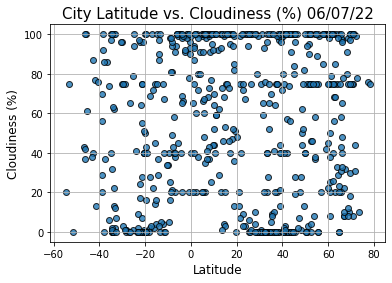

In [30]:
### Plot Latitude vs. Cloudiness 6.3.3

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"),fontsize = 15)
plt.ylabel("Cloudiness (%)",fontsize = 12)
plt.xlabel("Latitude",fontsize = 12)
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

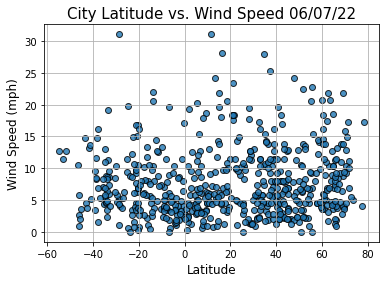

In [31]:
### Plot Latitude vs. Wind Speed  6.3.4

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"), fontsize = 15)
plt.ylabel("Wind Speed (mph)", fontsize = 12)
plt.xlabel("Latitude", fontsize = 12)
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

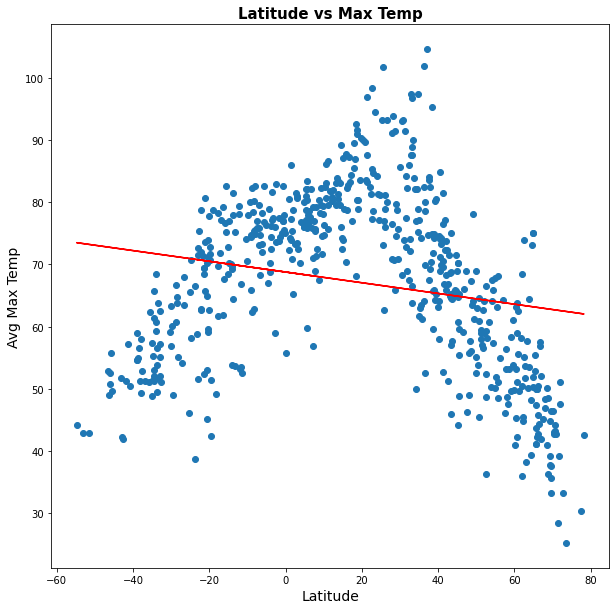

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title, fontsize=15, weight ='bold')
    plt.xlabel('Latitude', fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.show()
plt.figure(figsize=(10, 10))
plot_linear_regression(lats, max_temps, "Latitude vs Max Temp", "Avg Max Temp",(-30,5))

In [33]:
#simply displaying the 13th city in our randomly generated list
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2022-06-07 22:44:09
Lat                        -33.65
Lng                      115.3333
Max Temp                    56.62
Humidity                       54
Cloudiness                    100
Wind Speed                  19.15
Name: 13, dtype: object

In [34]:
# We'll be creating a data from of hemispheres for northern and southern basd on latitude(Lat)

# To create a West and East hemisphere use same logic but using Longitude(Lng)

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ishurdi,BD,2022-06-07 22:44:05,24.1333,89.0833,81.28,86,100,8.90
2,Olafsvik,IS,2022-06-07 22:44:06,64.8945,-23.7142,50.32,83,100,3.62
4,Chino Valley,US,2022-06-07 22:44:06,34.7575,-112.4538,97.41,15,0,10.36
5,Nikel,RU,2022-06-07 22:44:07,69.4128,30.2220,44.78,83,30,8.72
6,Salalah,OM,2022-06-07 22:44:07,17.0151,54.0924,84.29,79,40,6.91


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

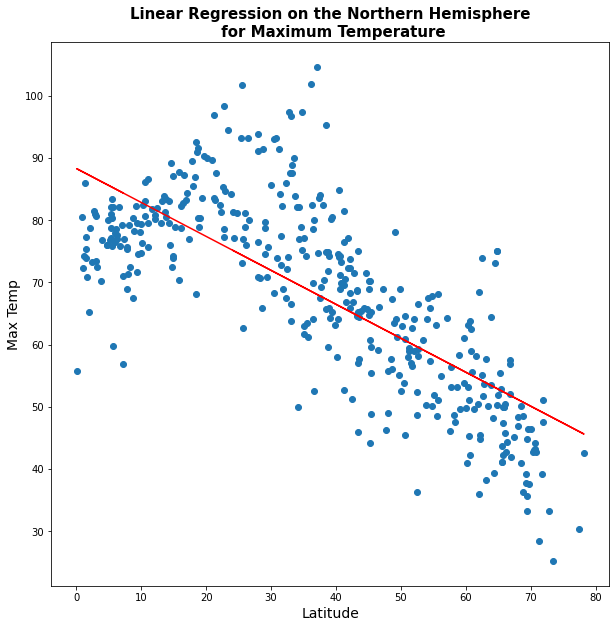

In [36]:
### Find the Correlation Between Latitude and Maximum Temperature  6.4.2
# Linear regression on the Northern Hemisphere by calling on function(def plot_linear_regression)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plt.figure(figsize=(10,10))
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,20))


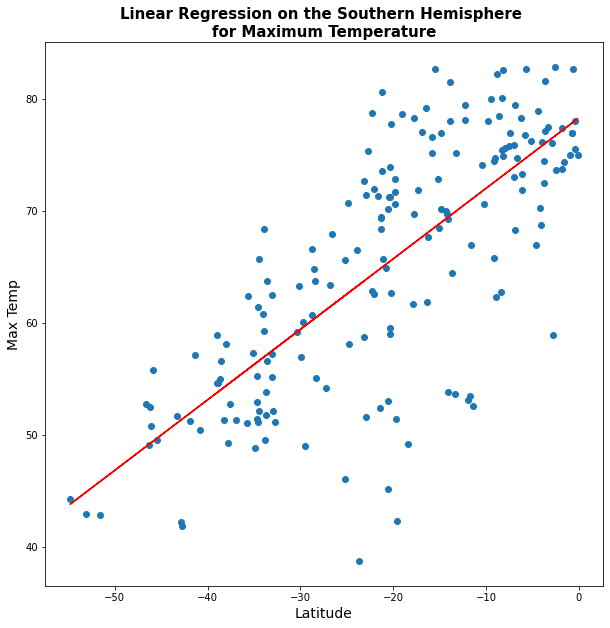

In [37]:
### Find the Correlation Between Latitude and Maximum Temperature  6.4.2
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plt.figure(figsize=(10,10))
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

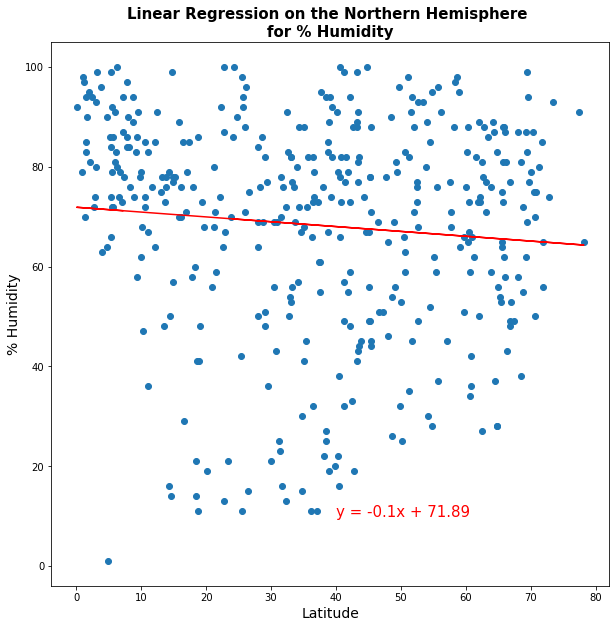

In [38]:
### Find the Correlation Between Latitude and Percent Humidity  6.4.3

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plt.figure(figsize=(10,10))
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

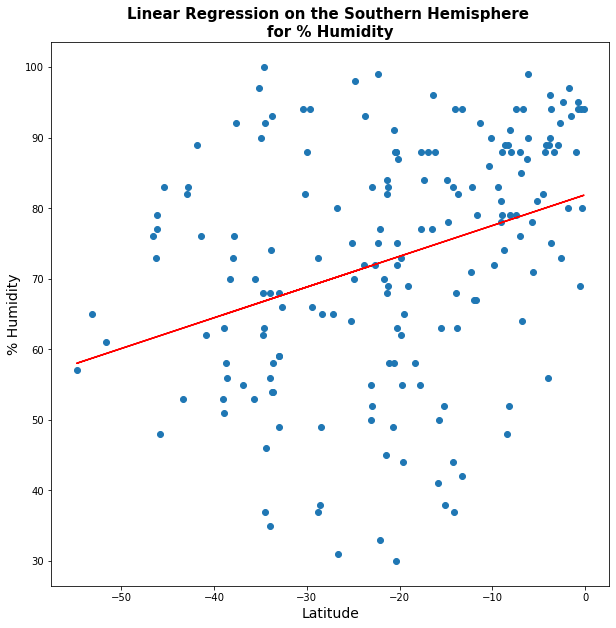

In [39]:
### Find the Correlation Between Latitude and Percent Humidity  6.4.3

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plt.figure(figsize=(10,10))
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

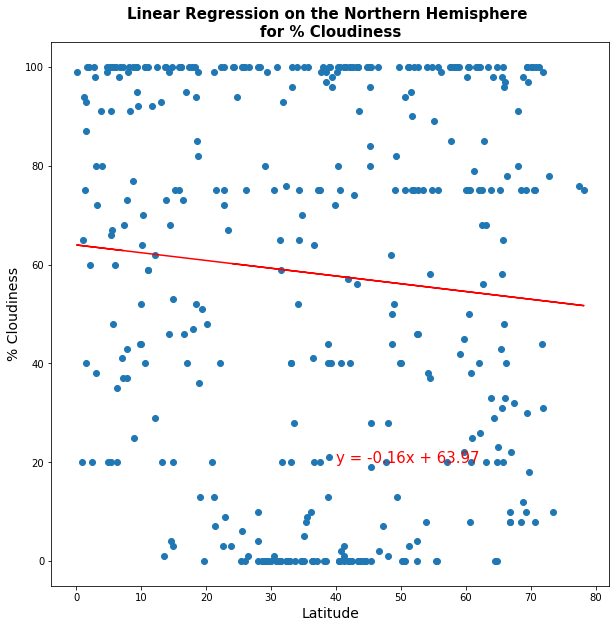

In [40]:
### Find the Correlation Between Latitude and Percent Cloudiness  6.4.4

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plt.figure(figsize=(10,10))
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,20))

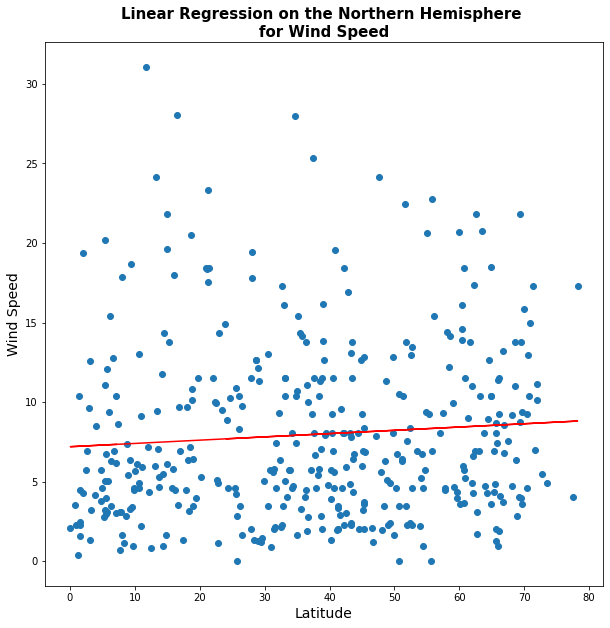

In [41]:
### Find the Correlation Between Latitude and Wind Speed  6.4.5

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plt.figure(figsize=(10,10))
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

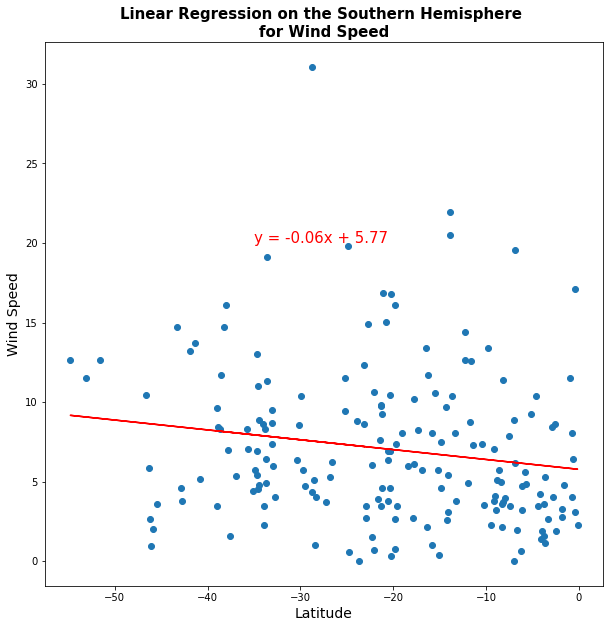

In [42]:
### Find the Correlation Between Latitude and Wind Speed  6.4.5

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plt.figure(figsize=(10,10))
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-35,20))